# <b><font size=7 color='orange'> Computer Assignment 2 - Task 2 </font></b>

<b><font color="orange" size="6">Collaborators:</font></b><br>
<font color="orange" size="5">
  <i>
     Mehrad Liviyan - 810101501<br>
     Shayan Saeedi - 810101442
  </i>
</font>


## Install Libraries

In [1]:
# !pip install opencv-python
# !pip install --upgrade matplotlib scipy opencv-python pybind11 numpy scikit-image 


## Load Images

Image 01.png loaded successfully


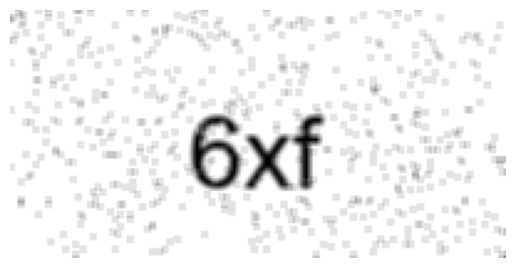

Image 02.png loaded successfully


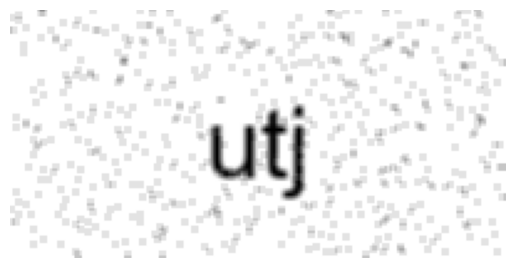

Image 03.png loaded successfully


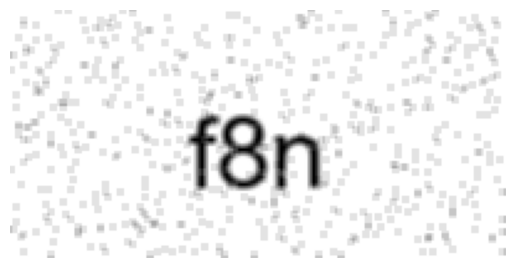

Image 04.png loaded successfully


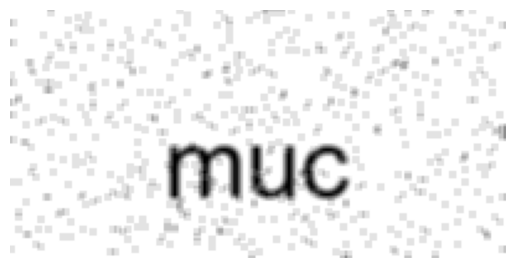

Image 05.png loaded successfully


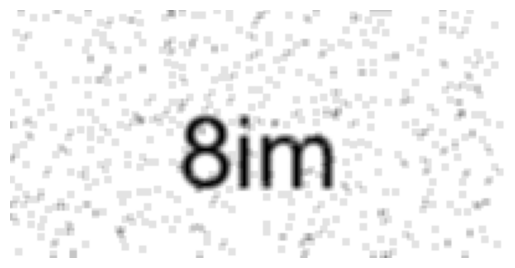

Image 06.png loaded successfully


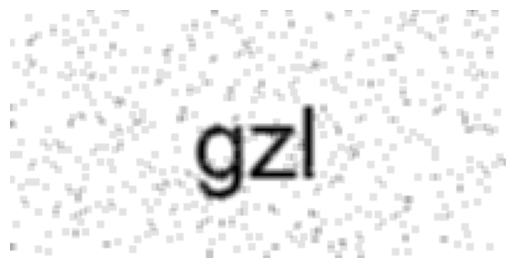

Image 07.png loaded successfully


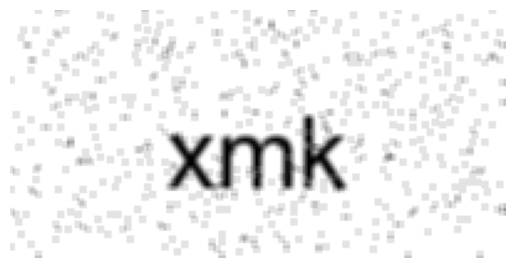

Image 08.png loaded successfully


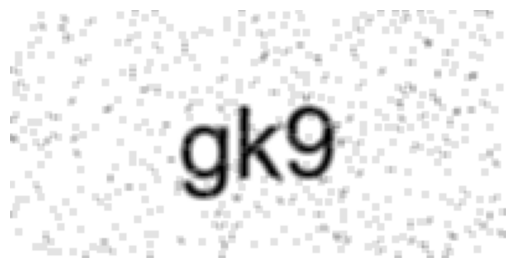

Image 09.png loaded successfully


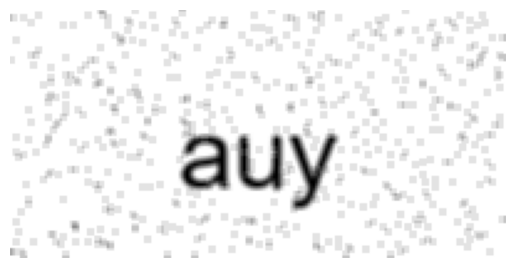

Image 10.png loaded successfully


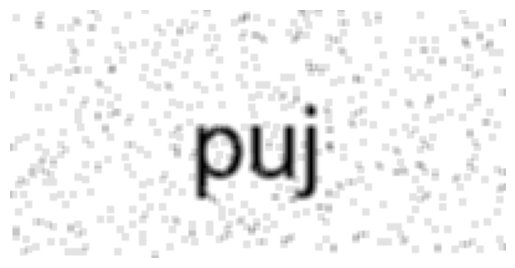

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

NUM_SAMPLES = 10
BLUR_PATH = "../Results/Blur_Captcha"

blur_images = []

for i in range(NUM_SAMPLES):
    image = cv2.imread(os.path.join(BLUR_PATH, f"{i+1:02d}.png"))
    if image is None:
        print("Error: Image {i+1:02d}.png not found or path is incorrect")
    else:
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        blur_images.append(rgb_image)
        print(f"Image {i+1:02d}.png loaded successfully")
        plt.imshow(rgb_image)
        plt.axis("off")
        plt.show()



Image 01.png loaded successfully


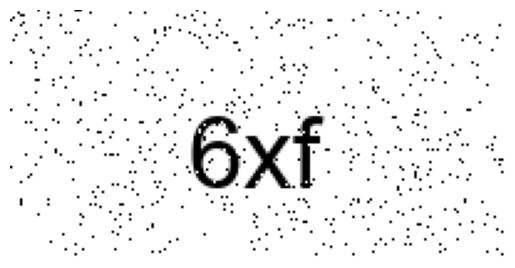

Image 02.png loaded successfully


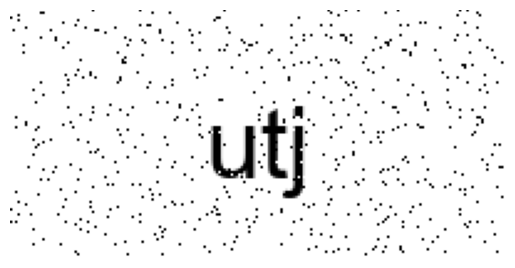

Image 03.png loaded successfully


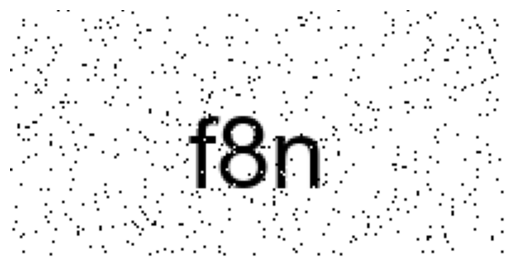

Image 04.png loaded successfully


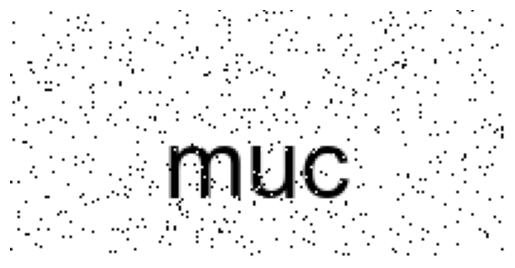

Image 05.png loaded successfully


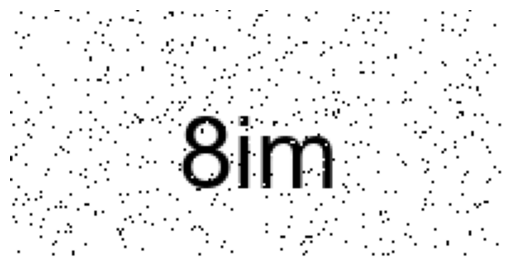

Image 06.png loaded successfully


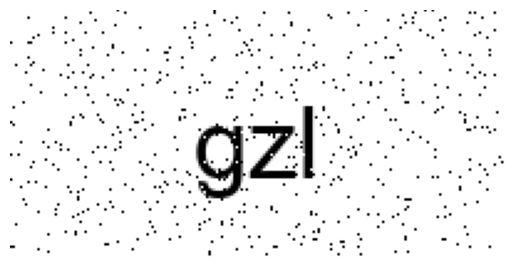

Image 07.png loaded successfully


Image 08.png loaded successfully


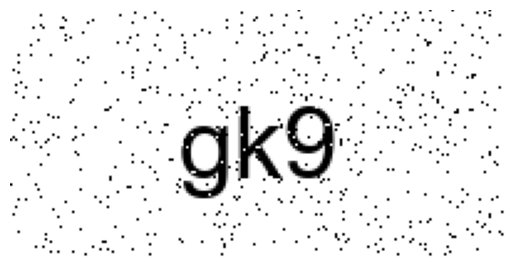

Image 09.png loaded successfully


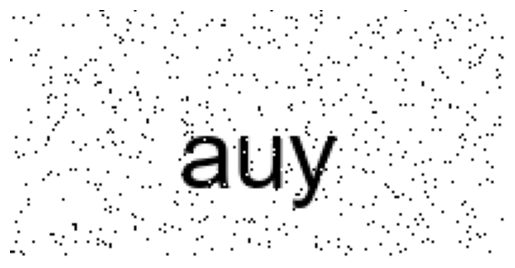

Image 10.png loaded successfully


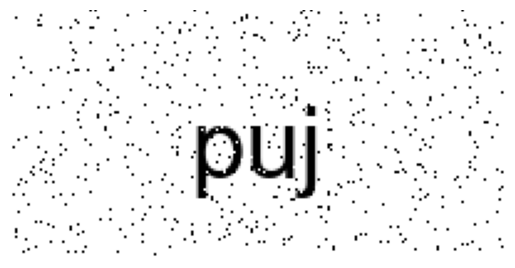

In [3]:
NOISE_PATH = "../Results/Noise_Captcha"

noise_images = []

for i in range(NUM_SAMPLES):
    image = cv2.imread(os.path.join(NOISE_PATH, f"{i+1:02d}.png"))
    if image is None:
        print("Error: Image {i+1:02d}.png not found or path is incorrect")
    else:
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        noise_images.append(rgb_image)
        print(f"Image {i+1:02d}.png loaded successfully")
        plt.imshow(rgb_image)
        plt.axis("off")
        plt.show()



Image 01.png loaded successfully


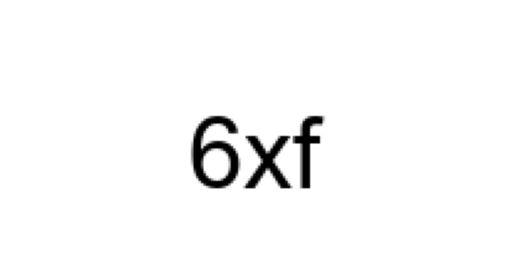

Image 02.png loaded successfully


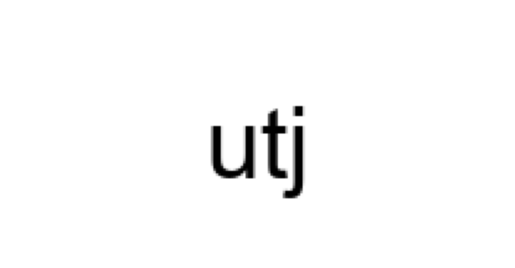

Image 03.png loaded successfully


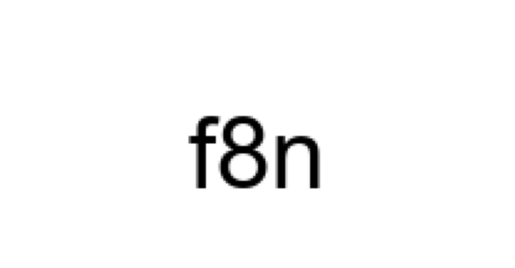

Image 04.png loaded successfully


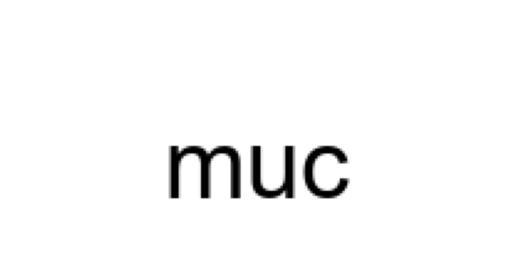

Image 05.png loaded successfully


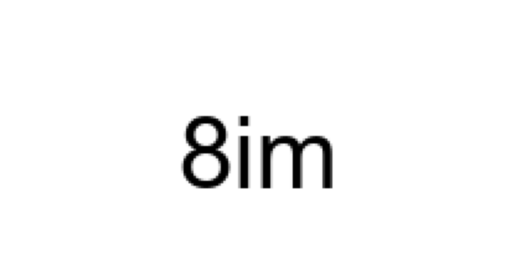

Image 06.png loaded successfully


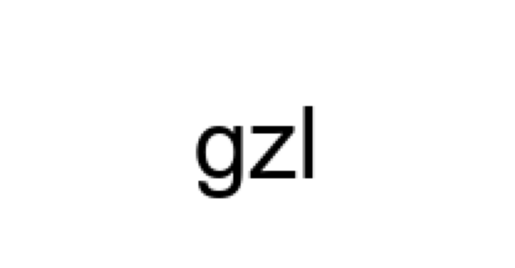

Image 07.png loaded successfully


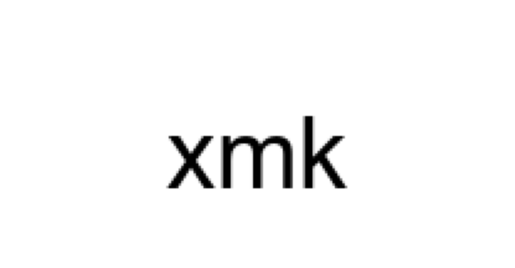

Image 08.png loaded successfully


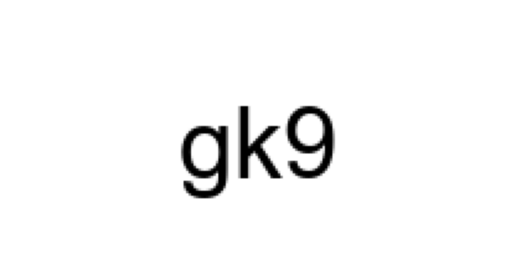

Image 09.png loaded successfully


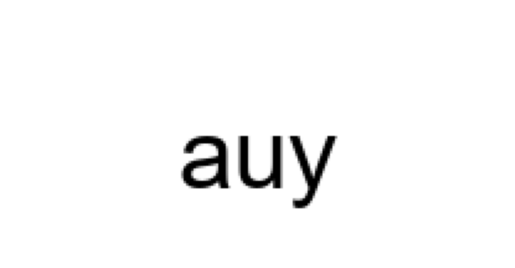

Image 10.png loaded successfully


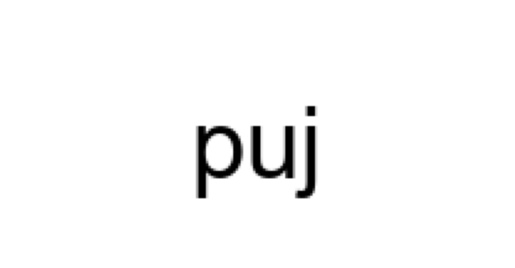

In [4]:
GENERATED_PATH = "../Results/Generated_Captcha"

real_images = []

for i in range(NUM_SAMPLES):
    image = cv2.imread(os.path.join(GENERATED_PATH, f"{i+1:02d}.png"))
    if image is None:
        print("Error: Image {i+1:02d}.png not found or path is incorrect")
    else:
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        real_images.append(rgb_image)
        print(f"Image {i+1:02d}.png loaded successfully")
        plt.imshow(rgb_image)
        plt.axis("off")
        plt.show()



## Part 1

<div dir="rtl">
نویز معمولاً به شکل پیکسل‌های ناگهانی خیلی روشن یا خیلی تاریک (مثل Salt & Pepper) در تصویر ظاهر می‌شود.
وقتی از فیلتر مات‌کننده استفاده می‌کنیم، مقدار هر پیکسل جدید برابر میانگین یا وزن‌دار پیکسل‌های اطرافش محاسبه می‌شود.

این کار باعث می‌شود تغییرات ناگهانی (نویز) ضعیف شود و تصویر یکنواخت‌تر به نظر برسد.

استفاده از Gaussian Kernel بهتر از Box Blur ساده نویز را حذف می کند، چون پیکسل‌های مرکزی وزن بیشتری دارند و پیکسل‌های اطراف کمتر، بنابراین هم نویز کم می‌شود و هم جزئیات لبه‌ها نسبی حفظ می‌شوند.

کرنل برای **Gaussian Kernel**:

1/16  2/16  1/16

2/16  4/16  2/16

1/16  2/16  1/16



همون طور که در نتیجه های زیر می بینیم کرنل گوسی کمی بهتر نویز رو از بین برده است اگر از 5 در 5 آن استفاده می کردیم بهتر می توانستیم نتیجه رو ببینیم.


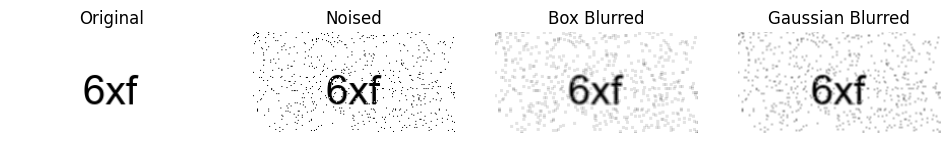

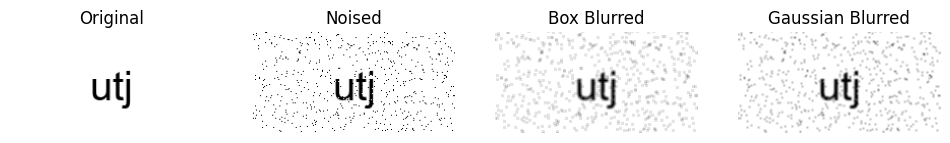

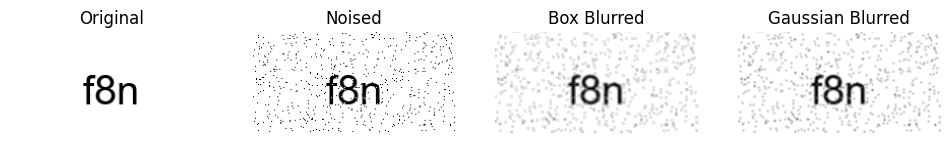

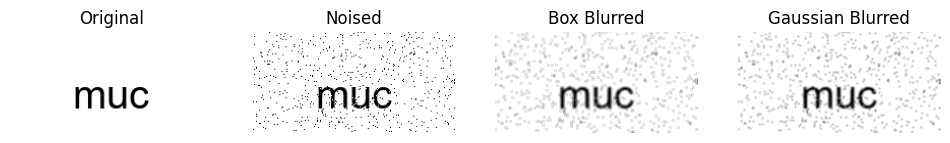

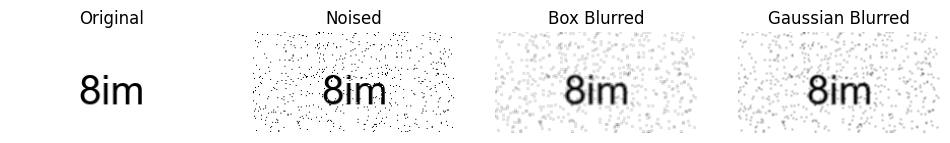

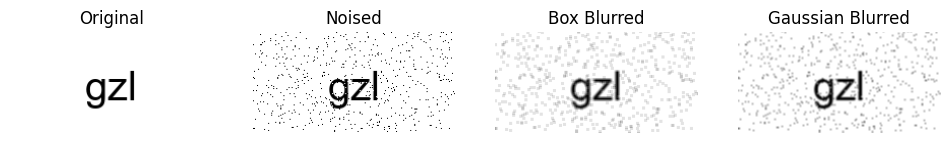

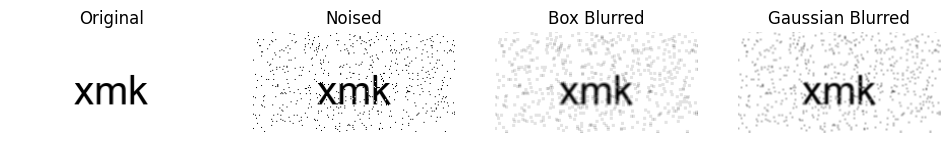

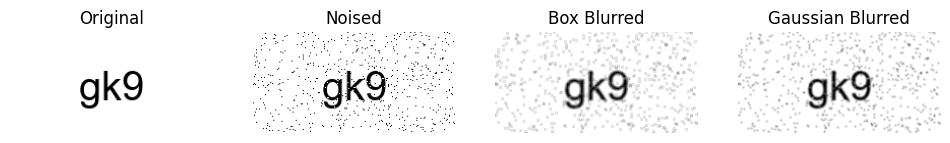

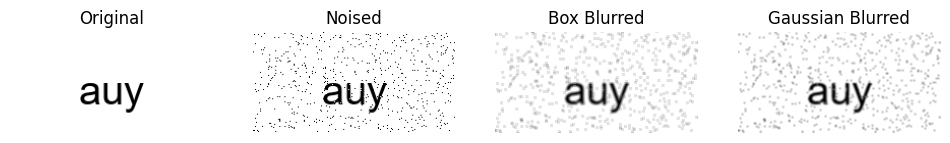

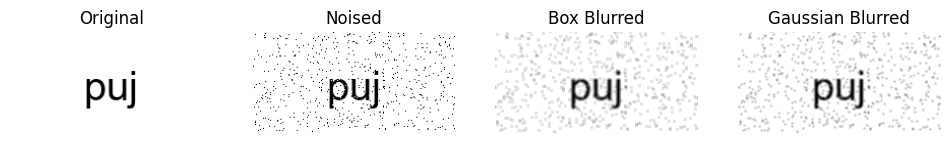

In [5]:
NOISE_PATH = "../Results/Gaussian_Blur_Captcha"
os.makedirs(NOISE_PATH, exist_ok=True)

gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]], dtype=np.float32) / 16

gaussian_images = []

for i in range(NUM_SAMPLES):
    noise_image = noise_images[i]         
    real_image = real_images[i] 
    blur_image = blur_images[i]
    
    gaussian_image = cv2.filter2D(noise_image, -1, gaussian_kernel)
    gaussian_images.append(gaussian_image)

    plt.figure(figsize=(12,4))

    plt.subplot(1,4,1)
    plt.imshow(cv2.cvtColor(real_image, cv2.COLOR_RGB2GRAY), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,4,2)
    plt.imshow(cv2.cvtColor(noise_image, cv2.COLOR_RGB2GRAY), cmap='gray')
    plt.title("Noised")
    plt.axis("off")

    plt.subplot(1,4,3)
    plt.imshow(cv2.cvtColor(blur_image, cv2.COLOR_RGB2GRAY), cmap='gray')
    plt.title("Box Blurred")
    plt.axis("off")
    
    plt.subplot(1,4,4)
    plt.imshow(cv2.cvtColor(gaussian_image, cv2.COLOR_RGB2GRAY), cmap='gray')
    plt.title("Gaussian Blurred")
    plt.axis("off")
    

    plt.show()

    cv2.imwrite(os.path.join(NOISE_PATH, f"{i+1:02d}.png"), gaussian_image)


<div dir="rtl">

استفاده از کرنل گوسی 5 در 5:

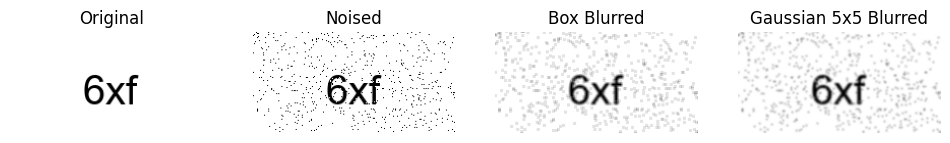

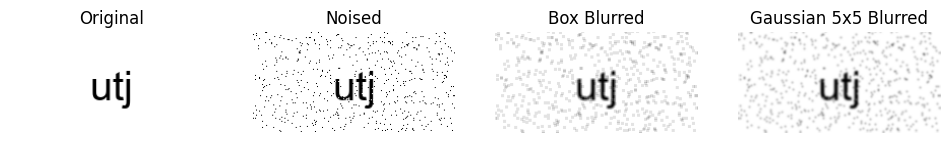

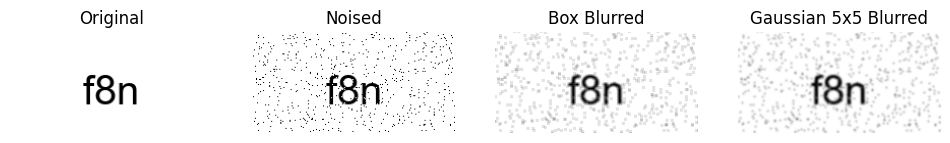

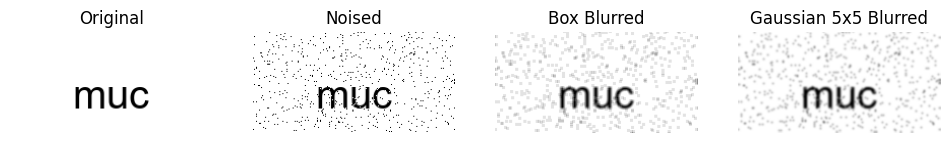

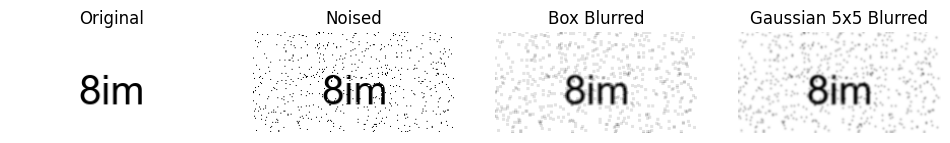

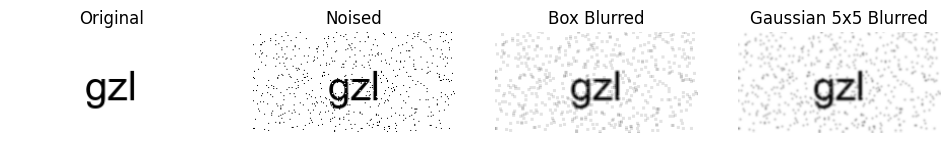

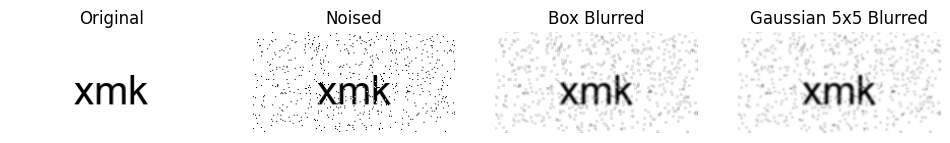

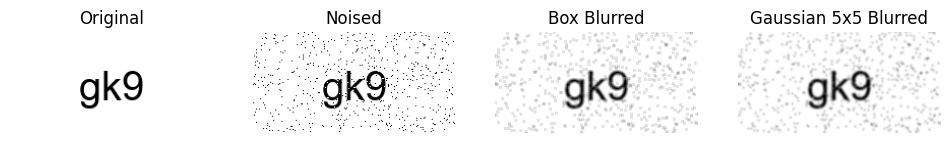

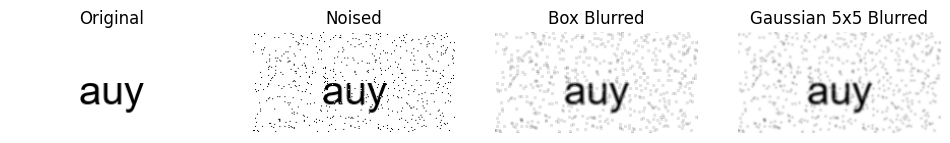

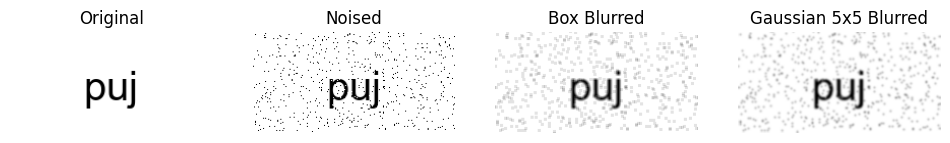

In [6]:

gaussian_1d = cv2.getGaussianKernel(ksize=5, sigma=1)   
gaussian_kernel = gaussian_1d @ gaussian_1d.T           

gaussian_images = []

for i in range(NUM_SAMPLES):
    noise_image = noise_images[i]         
    real_image = real_images[i] 
    blur_image = blur_images[i]

    gaussian_image = cv2.filter2D(noise_image, -1, gaussian_kernel)
    gaussian_images.append(gaussian_image)

    plt.figure(figsize=(12,4))

    plt.subplot(1,4,1)
    plt.imshow(cv2.cvtColor(real_image, cv2.COLOR_RGB2GRAY), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,4,2)
    plt.imshow(cv2.cvtColor(noise_image, cv2.COLOR_RGB2GRAY), cmap='gray')
    plt.title("Noised")
    plt.axis("off")

    plt.subplot(1,4,3)
    plt.imshow(cv2.cvtColor(blur_image, cv2.COLOR_RGB2GRAY), cmap='gray')
    plt.title("Box Blurred")
    plt.axis("off")
    
    plt.subplot(1,4,4)
    plt.imshow(cv2.cvtColor(gaussian_image, cv2.COLOR_RGB2GRAY), cmap='gray')
    plt.title("Gaussian 5x5 Blurred")
    plt.axis("off")
    
    plt.show()

    # cv2.imwrite(os.path.join(NOISE_PATH, f"{i+1:02d}.png"), gaussian_image)


## Sharpening

<div dir="rtl">

Sharpening یک فیلتر پردازشی است که لبه‌های تصویر را تقویت می‌کند.
در این روش، مقادیر پیکسل‌هایی که تغییر زیاد دارند (مثل لبه‌ها) بیشتر شده و جزئیات واضح‌تر می‌شوند.

مثال یک کرنل Sharpening:

    0, -1, 0

    -1, 5, -1
             
    0, -1, 0


Sharpening فقط کنتراست لبه‌ها را بالا می‌برد و تصویر تار را بازسازی نمی‌کند.
یعنی اگر تصویر اطلاعاتش به‌خاطر blur پخش شده باشد، Sharpening فقط لبه‌ها را شدیدتر می‌کند و
گاهی حتی نویز را هم بیشتر می‌کند.

## Deblurring (Wiener Filter)

<div dir="rtl">

وقتی تصویر تار می‌شود، در واقع مقدار هر پیکسل با پیکسل‌های اطرافش مخلوط می‌شود.
این اتفاق معمولاً توسط یک فیلتر (کرنل) مثل Box Blur یا Gaussian Blur رخ می‌دهد.

ریاضیِ پشت ماجرا اینه:

Blurred Image = Original Image ⊗ Blur Kernel  + Noise


(⊗ یعنی کانولوشن / Convolution)

Deblurring یعنی انجام عملیات معکوس این فرایند.

یعنی سعی می‌کنیم از تصویر تار شده، تصویر اصلی را دوباره تخمین بزنیم:

Original Image ≈ Deblurring(Blurred Image, Kernel)

Wiener Filter یکی از دقیق‌ترین روش‌ها برای Deblurring است، چون:

شکل مات کننده‌ی تصویر (کرنل Blur) را در نظر می‌گیرد،

نویز موجود در تصویر را تخمین می‌زند،

و تصویر را بازسازی می‌کند.

در حالی که Sharpening فقط لبه‌ها را تیزتر می‌کند،
Deblurring اطلاعات پخش‌شده را برمی‌گرداند.

در Wiener، مدل زیر استفاده می‌شود:

Output = Inverse(Blur Kernel) * Image


اما چون نویز هم وجود دارد، Wiener تعادل بین بازسازی تصویر و جلوگیری از تقویت نویز را برقرار می‌کند (پارامتر balance در کد همین کار را می‌کند).

## Choose sharpening

<div dir="rtl">

در این پروژه از بین Sharpening و Deblurring، روش Sharpening انتخاب شد.
هرچند Deblurring از نظر علمی دقیق‌تر است، اما نیازمند داشتن کرنل تاری و محاسبات پیچیده است و همچنین نویز تصویر را تقویت می‌کند.
در مقابل، Sharpening با افزایش اختلاف بین پیکسل‌های لبه، وضوح متن را بیشتر می‌کند و برای کپچا که هدف فقط خواناتر شدن است، گزینه‌ی مناسب‌تری می‌باشد.

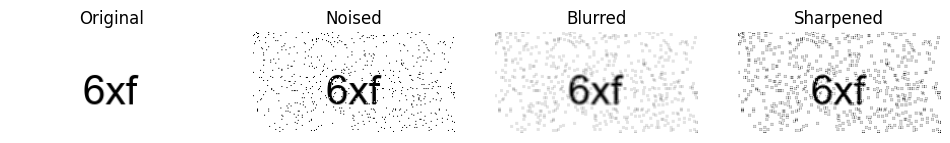

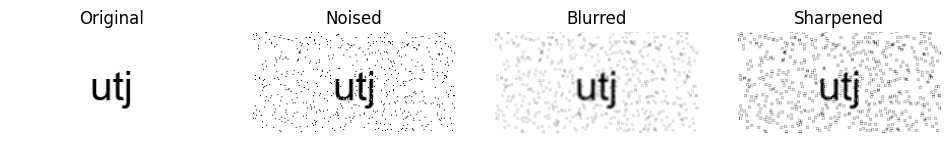

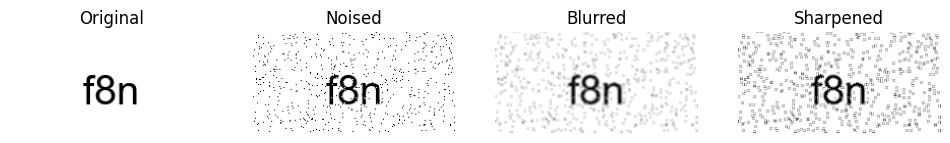

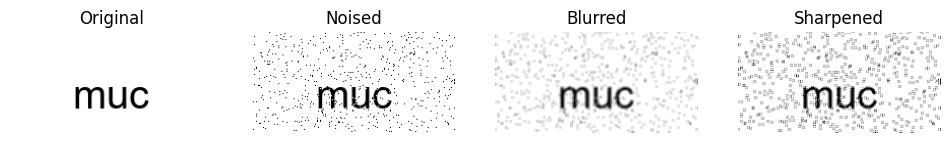

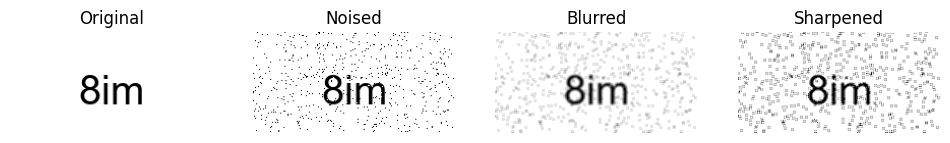

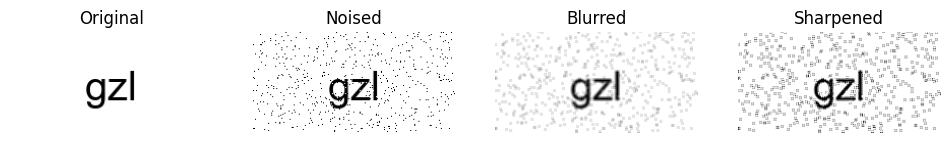

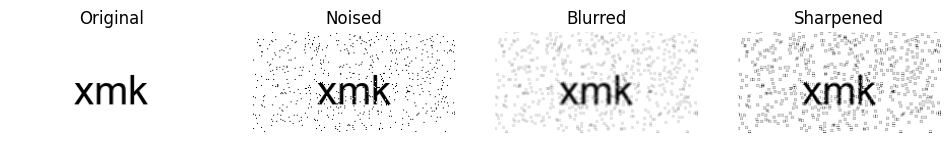

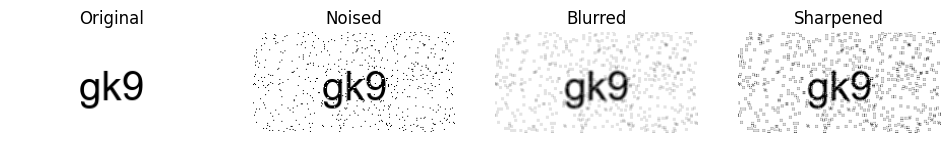

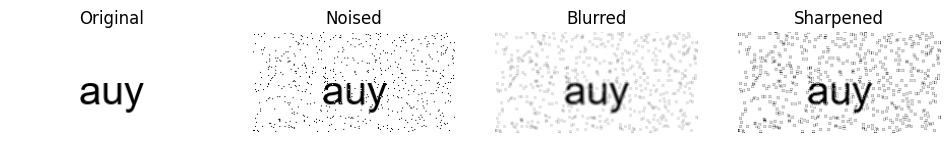

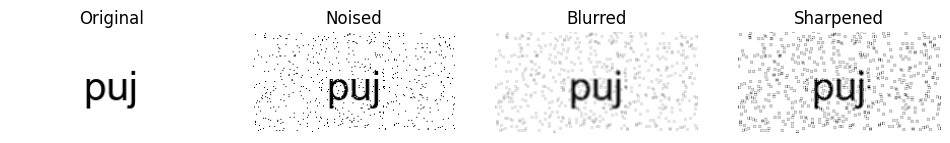

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

SHARP_PATH = "../Results/Sharpened_Captcha"
os.makedirs(SHARP_PATH, exist_ok=True)

kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

sharpened_images = []

for i in range(NUM_SAMPLES):

    blurred_image = blur_images[i]
    original = real_images[i]
    noise_image = noise_images[i]
    sharpened = cv2.filter2D(blurred_image, -1, kernel_sharpen)
    sharpened_images.append(sharpened)

    plt.figure(figsize=(12,6))
    plt.subplot(1,4,1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis("off")
    
    plt.subplot(1,4,2)
    plt.imshow(noise_image)
    plt.title("Noised")
    plt.axis("off")

    plt.subplot(1,4,3)
    plt.imshow(blurred_image)
    plt.title("Blurred")
    plt.axis("off")

    plt.subplot(1,4,4)
    plt.imshow(sharpened)
    plt.title("Sharpened")
    plt.axis("off")

    plt.show()

    cv2.imwrite(os.path.join(SHARP_PATH, f"{i+1:02d}.png"), cv2.cvtColor(sharpened, cv2.COLOR_RGB2BGR))


## Remove Noise

<div dir="rtl">

یکی از روش‌های حذف نویز در تصاویر کپچا، استفاده از باینری‌سازی (Thresholding) و سپس حذف اجزای متصل کوچک‌تر از یک مقدار آستانه است.
در این روش ابتدا تصویر به حالت سیاه و سفید تبدیل شده و سپس با انتخاب یک مقدار آستانه، تصویر به حالت باینری (۰ و ۱ / سفید و سیاه) در می‌آید.

سپس با الگوریتم Connected Components تمام نواحی متصل به هم پیدا می‌شود و بخش‌های کوچک (که معمولاً نویز هستند) حذف می‌شوند.
مزیت این روش این است که بسیار سریع و موثر است.

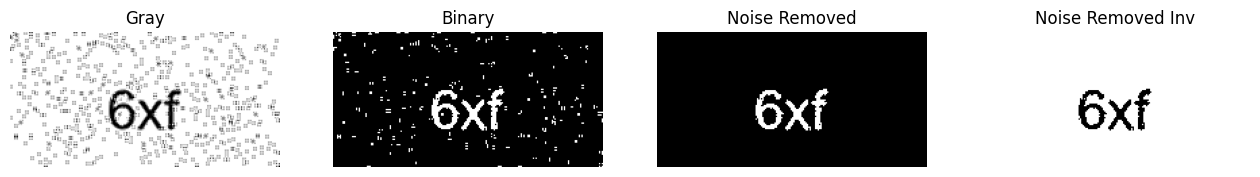

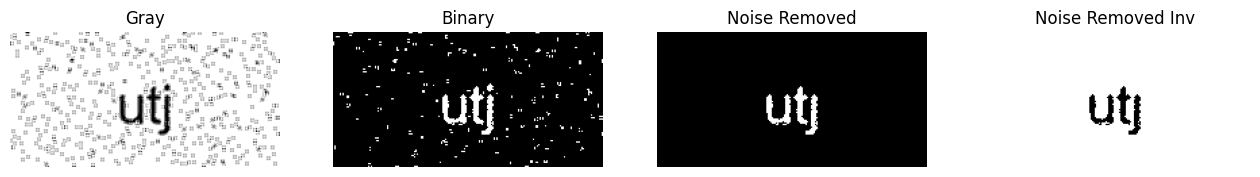

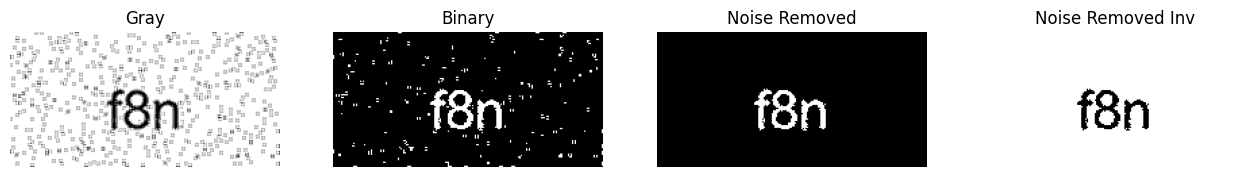

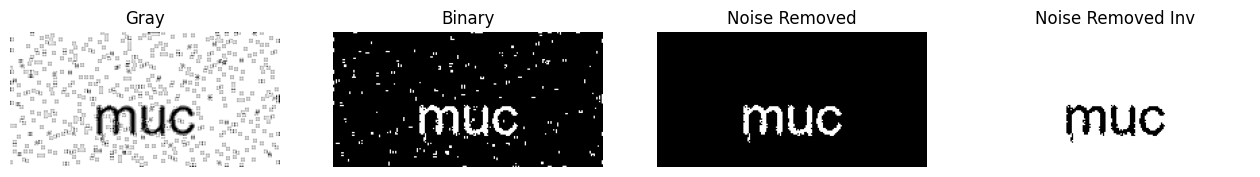

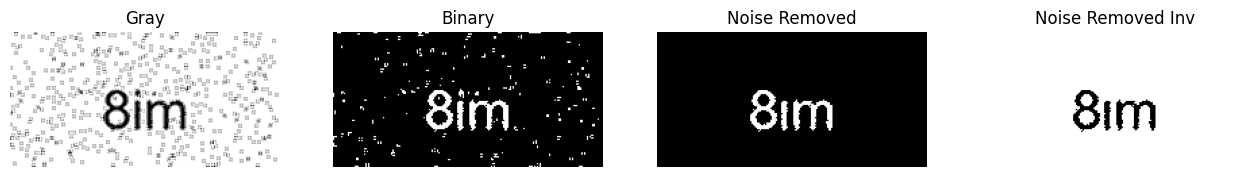

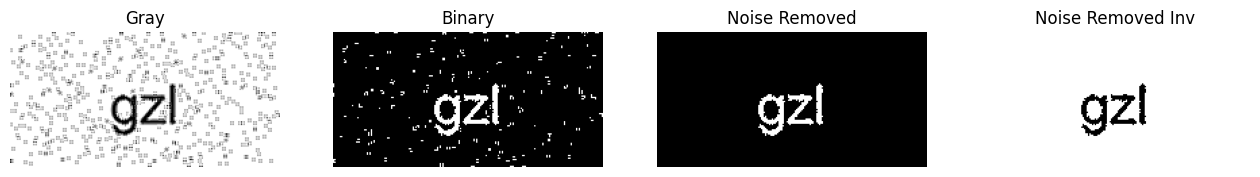

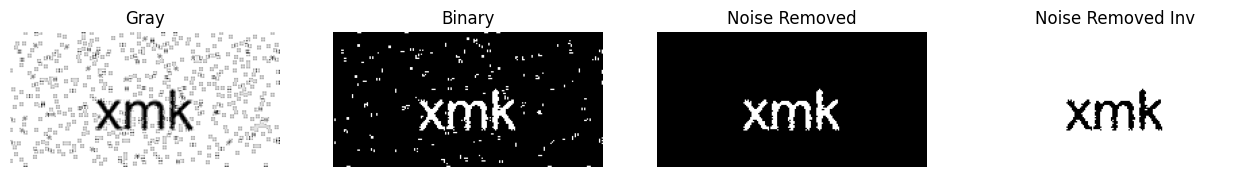

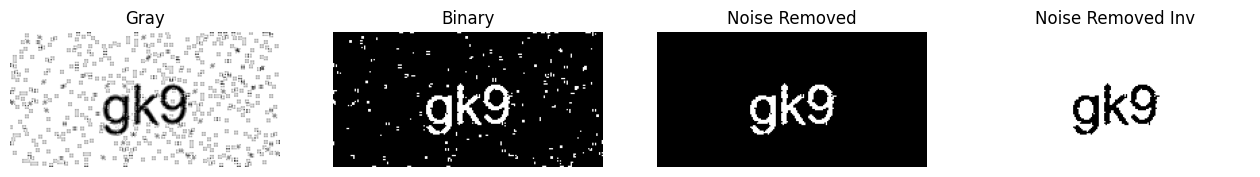

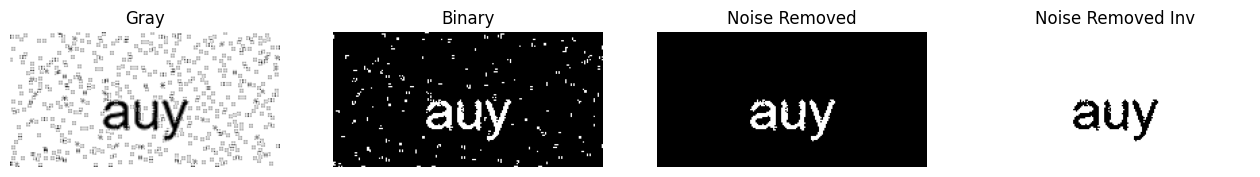

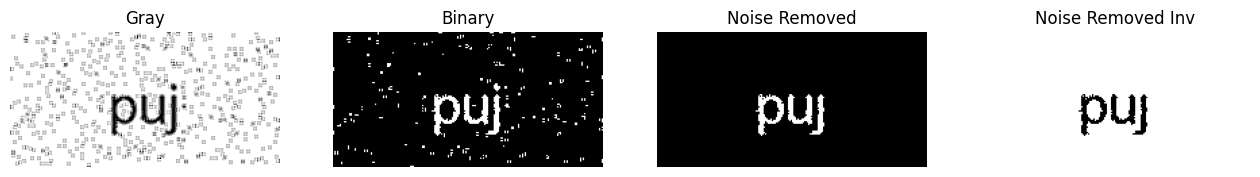

In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
     
OUTPUT_PATH = "../Results/Binary_Cleaned"      
os.makedirs(OUTPUT_PATH, exist_ok=True)

MIN_AREA = 50   
BINARY_THERSH = 150
WHITE_PIXEL = 255

for i in range(NUM_SAMPLES):  
    sharpened_image = sharpened_images[i]

    gray = cv2.cvtColor(sharpened_image, cv2.COLOR_RGB2GRAY)

    _, binary = cv2.threshold(gray, BINARY_THERSH, WHITE_PIXEL, cv2.THRESH_BINARY_INV)

    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary, connectivity=8)

    cleaned = np.zeros_like(binary)
    for label in range(1, num_labels):  
        if stats[label, cv2.CC_STAT_AREA] > MIN_AREA:
            cleaned[labels == label] = WHITE_PIXEL
            
    cleaned_inv = cv2.bitwise_not(cleaned)

    plt.figure(figsize=(16,6))
    plt.subplot(1,4,1), plt.imshow(gray, cmap="gray"), plt.title("Gray")
    plt.axis("off")
    plt.subplot(1,4,2), plt.imshow(binary, cmap="gray"), plt.title("Binary")
    plt.axis("off")
    plt.subplot(1,4,3), plt.imshow(cleaned, cmap="gray"), plt.title("Noise Removed")
    plt.axis("off")
    plt.subplot(1,4,4), plt.imshow(cleaned_inv, cmap="gray"), plt.title("Noise Removed Inv")
    plt.axis("off")
    plt.show()
    
    cv2.imwrite(os.path.join(OUTPUT_PATH, f"{i+1:02d}.png"), cleaned_inv)